In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/contradictory-my-dear-watson/sample_submission.csv
/kaggle/input/contradictory-my-dear-watson/train.csv
/kaggle/input/contradictory-my-dear-watson/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/train.csv')

In [3]:
!pip install nlp
from nlp import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.7 MB/s eta 0:00:00


2024-03-10 14:00:35.010924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 14:00:35.011029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 14:00:35.136990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import tensorflow as tf


def load_mnli(use_validation=True):
    result = []
    dataset = load_dataset('multi_nli')
    print(dataset['train'])
    keys = ['train', 'validation_matched','validation_mismatched'] if use_validation else ['train']
    for k in keys:
        for record in dataset[k]:
            c1, c2, c3 = record['premise'], record['hypothesis'], record['label']
            if c1 and c2 and c3 in {0,1,2}:
                result.append((c1,c2,c3,'en'))
    result = pd.DataFrame(result, columns=['premise','hypothesis', 'label','lang_abv'])
    return result


In [5]:
mnli = load_mnli(use_validation=True)

Downloading:   0%|          | 0.00/5.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/227M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset multi_nli downloaded and prepared to /root/.cache/huggingface/datasets/multi_nli/plain_text/1.0.0/60774175381b9f3f1e6ae1028229e3cdb270d50379f45b9f2c01008f50f09e6b. Subsequent calls will reuse this data.
Dataset(features: {'premise': Value(dtype='string', id=None), 'hypothesis': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=3, names=['entailment', 'neutral', 'contradiction'], names_file=None, id=None)}, num_rows: 392702)


In [6]:
mnli

,premise,hypothesis,label,lang_abv
0,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,1,en
1,you know during the season and i guess at at y...,You lose the things to the following level if ...,0,en
2,One of our number will carry out your instruct...,A member of my team will execute your orders w...,0,en
3,How do you know? All this is their information...,This information belongs to them.,0,en
4,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,1,en
...,...,...,...,...
412344,Do you watch that?,Can you see?,2,en
412345,"To a Western ear, the most predictable of lang...","To the Western ear, the least predictable of l...",2,en
412346,The recorder captured the sounds of loud thump...,The recorder didn't capture any of the sounds.,2,en
412347,That's a good attitude!,"You feel good about this, don't you?",1,en


In [7]:
total_train = data[['id', 'premise', 'hypothesis','lang_abv', 'language', 'label']]
total_train

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


In [8]:
mnli = mnli[['premise', 'hypothesis', 'lang_abv', 'label']]
mnli.insert(0, 'language', 'English')
mnli = mnli[['premise', 'hypothesis', 'lang_abv', 'language', 'label']]
mnli.insert(0, 'id', 'xxx')
mnli

,id,premise,hypothesis,lang_abv,language,label
0,xxx,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,en,English,1
1,xxx,you know during the season and i guess at at y...,You lose the things to the following level if ...,en,English,0
2,xxx,One of our number will carry out your instruct...,A member of my team will execute your orders w...,en,English,0
3,xxx,How do you know? All this is their information...,This information belongs to them.,en,English,0
4,xxx,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,en,English,1
...,...,...,...,...,...,...
412344,xxx,Do you watch that?,Can you see?,en,English,2
412345,xxx,"To a Western ear, the most predictable of lang...","To the Western ear, the least predictable of l...",en,English,2
412346,xxx,The recorder captured the sounds of loud thump...,The recorder didn't capture any of the sounds.,en,English,2
412347,xxx,That's a good attitude!,"You feel good about this, don't you?",en,English,1


In [9]:
data = pd.concat([total_train, mnli], axis = 0)
data

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
412344,xxx,Do you watch that?,Can you see?,en,English,2
412345,xxx,"To a Western ear, the most predictable of lang...","To the Western ear, the least predictable of l...",en,English,2
412346,xxx,The recorder captured the sounds of loud thump...,The recorder didn't capture any of the sounds.,en,English,2
412347,xxx,That's a good attitude!,"You feel good about this, don't you?",en,English,1


In [10]:
data.describe()

,label
count,424469.000000
mean,0.998594
std,0.817156
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [11]:
data.isna().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

In [12]:
data.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

In [13]:
data.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


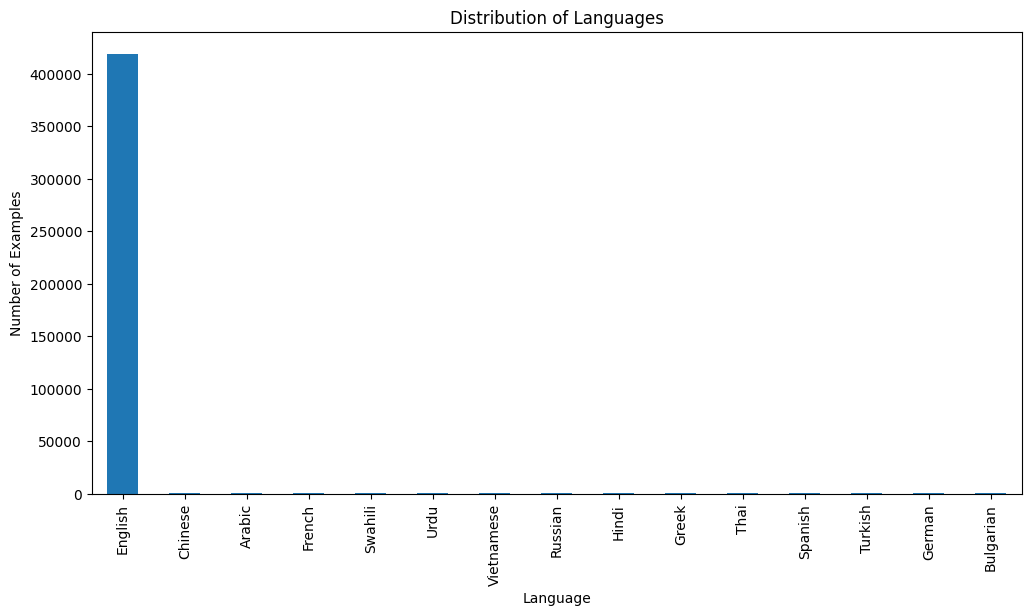

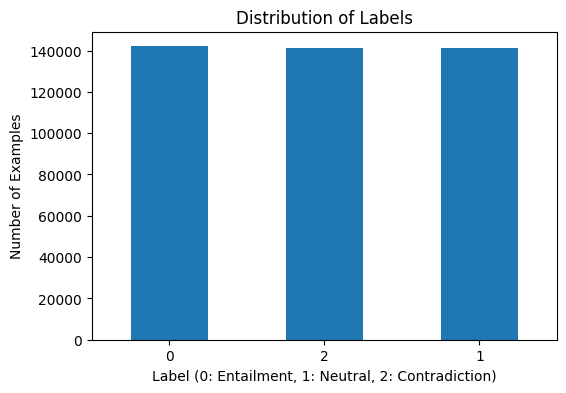

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data['language'].value_counts().plot(kind='bar')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Number of Examples')
plt.show()

plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label (0: Entailment, 1: Neutral, 2: Contradiction)')
plt.ylabel('Number of Examples')
plt.xticks(rotation=0)
plt.show()

In [15]:
language_distribution = data['language'].value_counts().reset_index()
language_distribution.columns = ['Language', 'Count']
language_distribution['Percentage'] = (language_distribution['Count'] / data.shape[0]) * 100

language_distribution


,Language,Count,Percentage
0,English,419219,98.763161
1,Chinese,411,0.096827
2,Arabic,401,0.094471
3,French,390,0.091880
4,Swahili,385,0.090702
5,Urdu,381,0.089759
6,Vietnamese,379,0.089288
7,Russian,376,0.088581
8,Hindi,374,0.088110
9,Greek,372,0.087639


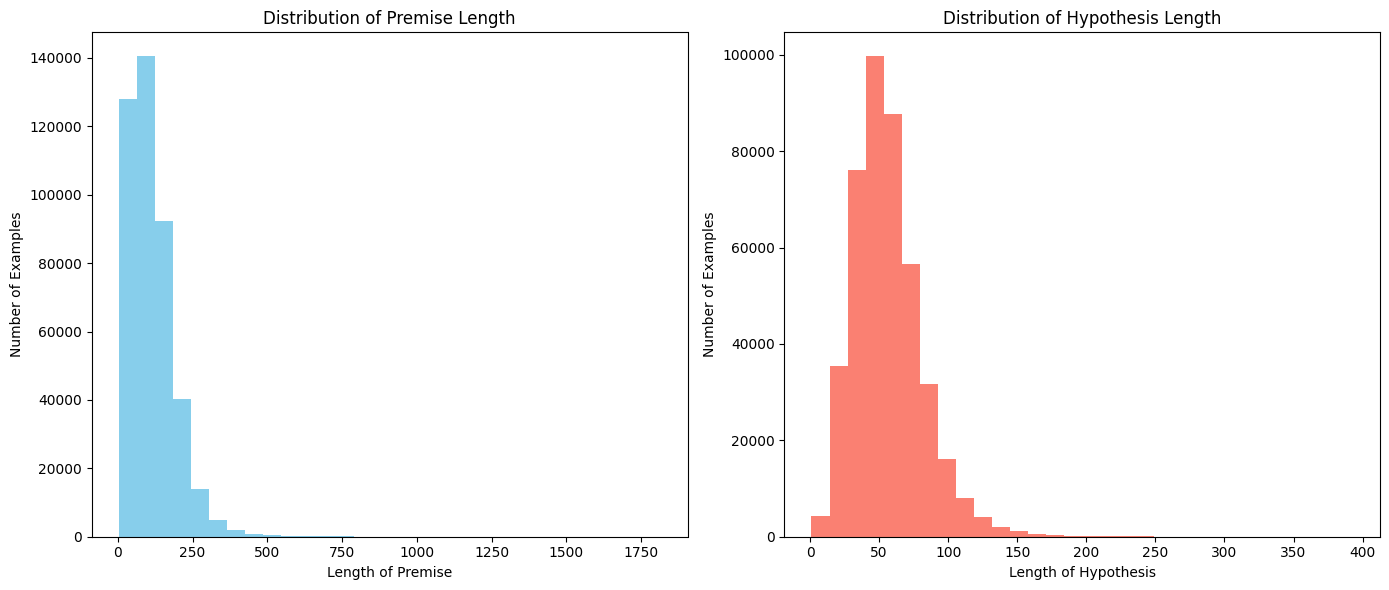

In [16]:
data['premise_length'] = data['premise'].apply(len)
data['hypothesis_length'] = data['hypothesis'].apply(len)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['premise_length'], bins=30, color='skyblue')
plt.title('Distribution of Premise Length')
plt.xlabel('Length of Premise')
plt.ylabel('Number of Examples')

plt.subplot(1, 2, 2)
plt.hist(data['hypothesis_length'], bins=30, color='salmon')
plt.title('Distribution of Hypothesis Length')
plt.xlabel('Length of Hypothesis')
plt.ylabel('Number of Examples')

plt.tight_layout()
plt.show()


In [17]:
class_distribution_by_language = data.groupby(['language', 'label']).size().unstack(fill_value=0)
class_distribution_by_language.columns = ['Entailment', 'Neutral', 'Contradiction']
class_distribution_by_language['Total'] = class_distribution_by_language.sum(axis=1)
class_distribution_by_language['Entailment (%)'] = (class_distribution_by_language['Entailment'] / class_distribution_by_language['Total']) * 100
class_distribution_by_language['Neutral (%)'] = (class_distribution_by_language['Neutral'] / class_distribution_by_language['Total']) * 100
class_distribution_by_language['Contradiction (%)'] = (class_distribution_by_language['Contradiction'] / class_distribution_by_language['Total']) * 100
class_distribution_by_language = class_distribution_by_language.sort_values(by='Total', ascending=False)

class_distribution_by_language


,Entailment,Neutral,Contradiction,Total,Entailment (%),Neutral (%),Contradiction (%)
language,,,,,,,
English,140268,139318,139633,419219,33.459361,33.232749,33.307889
Chinese,140,146,125,411,34.063260,35.523114,30.413625
Arabic,124,129,148,401,30.922693,32.169576,36.907731
French,133,129,128,390,34.102564,33.076923,32.820513
Swahili,140,109,136,385,36.363636,28.311688,35.324675
Urdu,133,110,138,381,34.908136,28.871391,36.220472
Vietnamese,122,149,108,379,32.189974,39.313984,28.496042
Russian,132,124,120,376,35.106383,32.978723,31.914894
Hindi,125,112,137,374,33.422460,29.946524,36.631016


In [18]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

(len(train_data), len(validation_data), len(test_data))

(339575, 42447, 42447)

In [19]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("symanto/xlm-roberta-base-snli-mnli-anli-xnli")
model = AutoModelForMaskedLM.from_pretrained("symanto/xlm-roberta-base-snli-mnli-anli-xnli")

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/921 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of XLMRobertaForMaskedLM were not initialized from the model checkpoint at symanto/xlm-roberta-base-snli-mnli-anli-xnli and are newly initialized: ['lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into train+val and test sets
train_val_df, test_df = train_test_split(data, test_size=0.1, random_state=42)  # 90% train+val, 10% test

# Split the train+val into train and val sets
train_df, val_df = train_test_split(train_val_df, test_size=(1/9), random_state=42)  # 80% train, 10% val (of the original dataset)

# Check the first few rows to ensure everything looks good
print(train_df.head())
print(val_df.head())
print(test_df.head())


         id                                            premise  \
87346   xxx              Thus they incur less in-office costs.   
228230  xxx  exactly exactly right yeah we we have i think ...   
51751   xxx  uh when i was in high school we had a choice o...   
292869  xxx  they just um they just send me everything and ...   
240679  xxx  i i've i've got all the videos that i can get ...   

                                               hypothesis lang_abv language  \
87346   By following a carefully crafted expenditures ...       en  English   
228230                  Name dropping could be very easy.       en  English   
51751   My high school did not give us any electives f...       en  English   
292869                     They send all the files to me.       en  English   
240679  I've been collecting Miss Marple videos since ...       en  English   

        label  premise_length  hypothesis_length  
87346       1              37                 85  
228230      1             

In [21]:
def tokenize_data(tokenizer, premises, hypotheses, max_length=128):
    encodings = tokenizer(premises, hypotheses, 
                          max_length=max_length, 
                          truncation=True, 
                          padding='max_length', 
                          return_tensors='pt')  
    return encodings

train_encodings = tokenize_data(tokenizer, train_df['premise'].tolist(), train_df['hypothesis'].tolist())
val_encodings = tokenize_data(tokenizer, val_df['premise'].tolist(), val_df['hypothesis'].tolist())
test_encodings = tokenize_data(tokenizer, test_df['premise'].tolist(), test_df['hypothesis'].tolist())


In [22]:
from torch.utils.data import Dataset, DataLoader

class TextClassificationDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TextClassificationDataset(train_encodings, train_df['label'].tolist())
val_dataset = TextClassificationDataset(val_encodings, val_df['label'].tolist())
test_dataset = TextClassificationDataset(test_encodings, test_df['label'].tolist())


In [23]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

batch_size = 16  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=data_collator)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=data_collator)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=data_collator)

In [24]:
train_loader

In [25]:
from transformers import AutoModelForSequenceClassification

num_labels = 3
model = AutoModelForSequenceClassification.from_pretrained("symanto/xlm-roberta-base-snli-mnli-anli-xnli", num_labels=num_labels)

In [26]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-6) 

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
early_stopping_patience = 10
early_stopping_counter = 0
best_val_loss = np.Inf

In [28]:
import torch
from tqdm import tqdm  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 1

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader, leave=True):
        batch = {k: v.to(device) for k, v in batch.items()}

        optimizer.zero_grad()

        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss = train_loss / len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(**batch)
            loss = outputs.loss

            val_loss += loss.item()

    val_loss = val_loss / len(val_loader)

    scheduler.step(val_loss)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0 
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break 

  0%|          | 0/21224 [00:00<?, ?it/s]/tmp/ipykernel_26/3715648104.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 21224/21224 [1:17:17<00:00,  4.58it/s]


Epoch 1, Train Loss: 0.4307, Val Loss: 0.3944


In [29]:
model.save_pretrained('/kaggle/working/model/contradiction_model')

In [30]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset

model_path = '/kaggle/working/model/contradiction_model' 
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained('symanto/xlm-roberta-base-snli-mnli-anli-xnli')

test_file_path = '/kaggle/input/contradictory-my-dear-watson/test.csv'  
test_data = pd.read_csv(test_file_path)

class PredictionDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

test_encodings = tokenizer(test_data['premise'].tolist(), test_data['hypothesis'].tolist(),
                           truncation=True, padding=True, max_length=128, return_tensors="pt")
test_dataset = PredictionDataset(test_encodings)
test_loader = DataLoader(test_dataset, batch_size=16) 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=1)
        predictions.extend(preds.cpu().numpy())

test_data['prediction'] = predictions
output_file_path = 'submission.csv'  
test_data[['id', 'prediction']].to_csv(output_file_path, index=False)


/tmp/ipykernel_26/1018654325.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
